# <center>KNN (k-nearest neighboors)<center>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(3.2, 7, 'Novo papel')

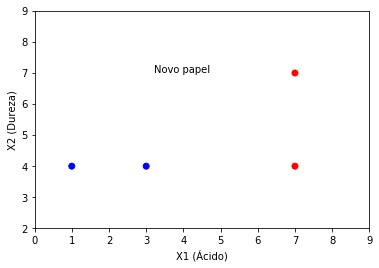

In [2]:
plt.scatter([7,7,3,1],[7,4,4,4], c=['red','red','blue','blue'])
plt.ylim([2,9])
plt.xlim([0,9])
plt.xlabel('X1 (Ácido)')
plt.ylabel('X2 (Dureza)')
plt.text(x=3.2, y=7, s='Novo papel')

**Distância euclidiana**

**Algoritmo**

**Aplicando KNN com sklearn**

Importando módulos

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as pd

*Dados de estudo*

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
dados = load_breast_cancer()

In [6]:
print(dados['DESCR'])
# 1 = benigno, 0 = maligno

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

**Separando em treino e teste**

In [7]:
# o sklearn já traz as variáveis resposta (y) e preditoras (x) pré separadas
y = dados.target
x = dados.data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xTreino, xTeste, yTreino, yTeste = train_test_split(x, y)

**Criando o modelo**

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
modelo = KNeighborsClassifier(n_neighbors=3)

In [12]:
modelo.fit(xTreino, yTreino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Prevendo resultados**

In [13]:
preditos = modelo.predict(xTeste)

In [14]:
preditos

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [15]:
import pandas as pd
pd.DataFrame(zip(preditos, y), columns=['Preditos', 'Verdadeiro'])

,Preditos,Verdadeiro
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,1,0
7,0,0
8,1,0
9,1,0


**Verificando acurácia da classificação**

... Digitado pelo professor

![](conf_matr.jpeg)

Principais métricas

- acurácia

- precisão


$$ precisao = \frac{TP}{TP+FP} $$

- revogação ou recall

**Calculando as métricas com sklearn**

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, precision_score

In [17]:
print(classification_report(y_true=yTeste, y_pred=preditos))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.95      0.94      0.94        98

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [18]:
accuracy_score(y_true=yTeste, y_pred=preditos)

0.9230769230769231

In [19]:
confusion_matrix(y_true=yTeste, y_pred=preditos)

array([[40,  5],
       [ 6, 92]])

In [20]:
precision_score(y_true=yTeste, y_pred=preditos)

0.9484536082474226

**Distribuição dos valores da acurácia**

In [21]:
acc_list = []
contador = 0

In [22]:
contador = 0
while contador < 500:
    #dados de treino e teste
    xTreino, xTeste, yTreino, yTeste = train_test_split(x, y)
    
    #criando o modelo
    modelo = KNeighborsClassifier(n_neighbors=5)
    
    #treinamento
    modelo.fit(xTreino, yTreino)
    
    #predições
    preditos = modelo.predict(xTeste)
    
    #acuracia
    acc_i = accuracy_score(y_true=yTeste, y_pred=preditos)
    acc_i = round(acc_i, 4)
    acc_list.append(acc_i)
    
    contador +=1

(array([  4.,  10.,  42.,  41., 115.,  85., 119.,  66.,   8.,  10.]),
 array([0.8741 , 0.88459, 0.89508, 0.90557, 0.91606, 0.92655, 0.93704,
        0.94753, 0.95802, 0.96851, 0.979  ]),
 <a list of 10 Patch objects>)

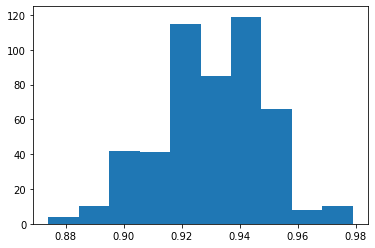

In [23]:
plt.hist(acc_list)

**Tuning do modelo**

Normalizando os dados

In [24]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [25]:
#normalizando x
from sklearn.preprocessing import StandardScaler

In [26]:
norm = StandardScaler()

In [27]:
Xnorm = norm.fit_transform(x)

In [28]:
pd.DataFrame(Xnorm).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Achando o melhor K (curva do cotovelo)

In [29]:
import numpy as np
xTreino, xTeste, yTreino, yTeste = train_test_split(Xnorm, y)
lista_erros = []
lista_k = []

for k in range(1,20):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(xTreino, yTreino)
    
    preditos = modelo.predict(xTeste)
    
    rmse = np.sqrt(mean_squared_error(yTeste, preditos))
    lista_erros.append(rmse)
    lista_k.append(k)

In [30]:
erro_df = pd.DataFrame(zip(lista_erros, lista_k), columns=['RMSE', 'K'])

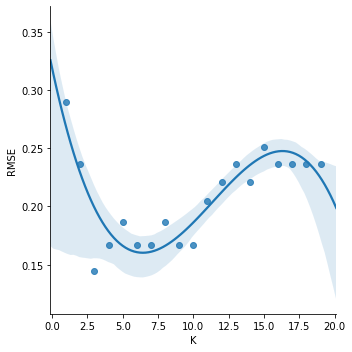

In [31]:
import seaborn as sns

sns.lmplot(y='RMSE', x='K', data=erro_df, order=3)

Achado melhor K (usando distribuição de valores)

In [32]:
lista_k = []
lista_ac = []
contador = 0

In [33]:

while contador < 300:
    listaAc = []
    listaK = []
    
    xTreino, xTeste, yTreino, yTeste = train_test_split(Xnorm, y)
    
    for k in range(1,20):
        modelo = KNeighborsClassifier(n_neighbors=k)
        modelo.fit(xTreino, yTreino)

        preditos = modelo.predict(xTeste)

        ac = accuracy_score(yTeste, preditos)
        
        listaAc.append(ac)
        listaK.append(k)
    
    melhorAcIdx = np.argmax(listaAc)
    melhorK = listaK[melhorAcIdx]
    melhorAc = np.max(listaAc)
    
    lista_k.append(melhorK)
    lista_ac.append(melhorAc)
    
    contador+=1

%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


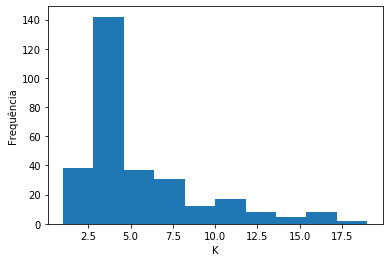

In [34]:
plt.hist(lista_k)
plt.xlabel('K')
plt.ylabel('Frequência')

%time

## Aplicando KNN para um problema de regressão

Assumindo o conjunto de dados

![](knnreg_dados.png)

Visualizando graficamenteo

![](knnreg_graf.png)

Toma-se as distâncias

![](knnreg_dist.png)

Defini-se os K vizinhos de interesse:

![](knnreg_kneig.png)

Interpola-se o valor do dado não classificado a partir dos vizinhos mais próximos

![](knnreg_kneig_calc.png)

In [35]:
weight = (77 + 72 + 60)/ 3
weight

69.66666666666667

**Implementando com `sklearn`**

In [36]:
tips = sns.load_dataset('tips')

In [37]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Separando variáveis

In [38]:
x = tips.drop(['tip', 'sex', 'smoker', 'day', 'time'], axis=1)
y = tips['tip']

Normalizando dados

In [39]:
norm = StandardScaler()

In [40]:
Xnorm = norm.fit_transform(x)

In [41]:
xTreino, xTeste, yTreino, yTeste = train_test_split(Xnorm, y)

In [42]:
##criando o modelo
from sklearn.neighbors import KNeighborsRegressor
modelo = KNeighborsRegressor()

In [43]:
modelo.fit(xTreino, yTreino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
preditos = modelo.predict(xTeste)

In [45]:
pd.DataFrame(zip(preditos, yTeste, np.abs(preditos - yTeste)), columns=['Predito', 'Real', 'Desvio'])

,Predito,Real,Desvio
0,3.292,6.50,3.208
1,2.800,3.00,0.200
2,2.682,2.09,0.592
3,5.892,9.00,3.108
4,1.534,1.44,0.094
5,4.580,7.58,3.000
6,3.472,1.17,2.302
7,2.934,2.50,0.434
8,1.824,2.00,0.176
9,2.382,1.66,0.722


In [46]:
#avaliando o modelo
modelo.score(xTreino, yTreino)

0.5759977993877599

In [47]:
modelo.score(xTeste, yTeste)

0.29441529637820496

In [48]:
rmse = np.sqrt(mean_squared_error(yTeste, preditos))
rmse

1.301727880706961

## Exercicio

**Empregar KNN para fazer classificação com o dataset da `iris`**

In [49]:
from sklearn import datasets

In [50]:
iris = datasets.load_iris()

In [51]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
y = dados.target
x = dados.data

In [53]:
from sklearn.model_selection import train_test_split
xTreino, xTeste, yTreino, yTeste = train_test_split(x, y)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier(n_neighbors=3)

In [55]:
modelo.fit(xTreino, yTreino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [56]:
preditos = modelo.predict(xTeste)

In [57]:
preditos

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [58]:
import pandas as pd
pd.DataFrame(zip(preditos, y), columns=['Preditos', 'Verdadeiro'])

,Preditos,Verdadeiro
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0
5,1,0
6,1,0
7,0,0
8,1,0
9,1,0


In [59]:
print(classification_report(y_true=yTeste, y_pred=preditos))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        54
           1       0.93      0.94      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

